## Simple workflow or graph using langgraph

In [40]:
#states

from typing import TypedDict

In [41]:
class State(TypedDict):
    graph_info:str

In [42]:
# Nodes
def start_node(state:State):
    print("start_node")
    return state

def first_node(state:State):
    print("first_node")
    return state

def second_node(state:State):
    print("second_node")

In [43]:
import random
from typing import Literal

In [76]:
def random_node(state:State)-> Literal["first_node","second_node"]:
    graph_info=state["graph_info"]
    return "first_node" if random.random()>0.1 else "second_node"

## Graph Construction

In [77]:
from IPython.display import Image,display
from langgraph.graph import StateGraph, END, START

In [78]:
#build graph
graph= StateGraph(State)

# adding node
graph.add_node("start_node",start_node)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)

# scheduling flow of the node (edges).
graph.add_edge(START,"start_node")
graph.add_conditional_edges("start_node",random_node)
graph.add_edge("first_node",END)
graph.add_edge("second_node",END)


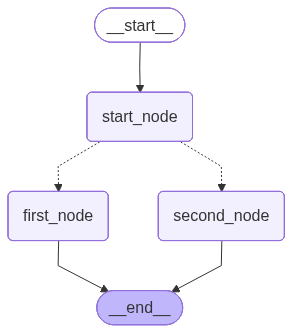

In [82]:
# Compile the graph

graph_builder=graph.compile()

# display(Image(graph_builder.get_graph().draw_mermaid_png()))
png_bytes = graph_builder.get_graph().draw_mermaid_png()
display(Image(png_bytes))

#save workflow
with open("chatbot_workflow.png", "wb") as f:
    f.write(png_bytes)

## Graph Invocation

In [80]:
graph_builder.invoke({"graph_info":"I am playing with langgraph."})

start_node
first_node


{'graph_info': 'I am playing with langgraph.'}